In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = r'C:\Users\RAVINDER\Downloads\traffic-signs-data\train.p'
validation_file= r'C:\Users\RAVINDER\Downloads\traffic-signs-data\valid.p'
testing_file = r'C:\Users\RAVINDER\Downloads\traffic-signs-data\test.p'
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [12]:
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", len(X_valid))
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


0. Speed limit (20km/h) - Samples: 180


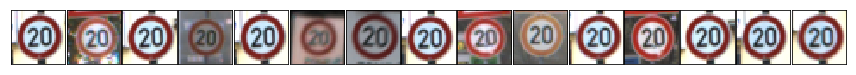

1. Speed limit (30km/h) - Samples: 1980


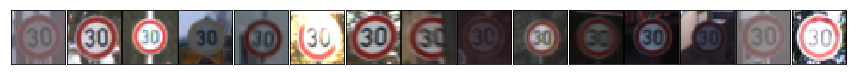

2. Speed limit (50km/h) - Samples: 2010


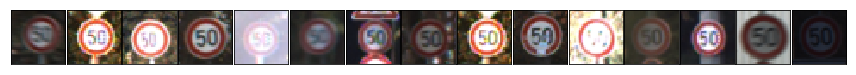

3. Speed limit (60km/h) - Samples: 1260


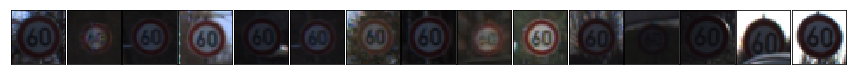

4. Speed limit (70km/h) - Samples: 1770


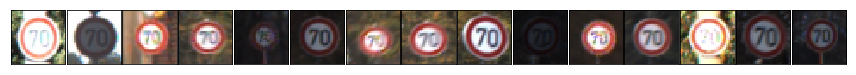

5. Speed limit (80km/h) - Samples: 1650


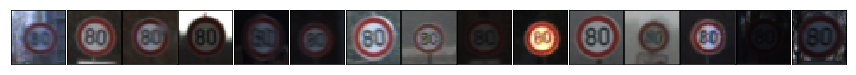

6. End of speed limit (80km/h) - Samples: 360


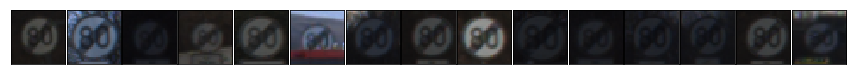

7. Speed limit (100km/h) - Samples: 1290


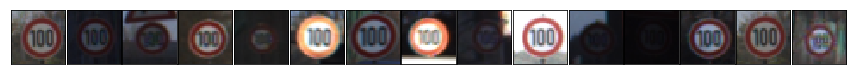

8. Speed limit (120km/h) - Samples: 1260


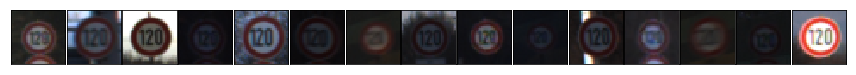

9. No passing - Samples: 1320


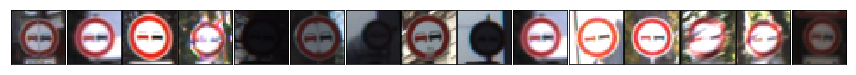

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


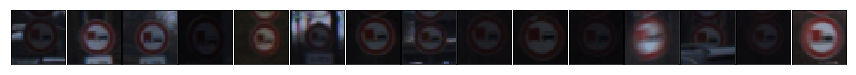

11. Right-of-way at the next intersection - Samples: 1170


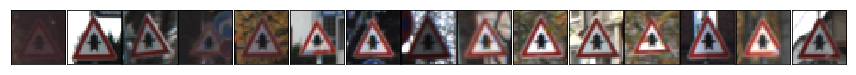

12. Priority road - Samples: 1890


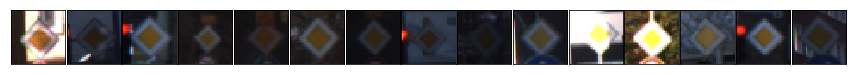

13. Yield - Samples: 1920


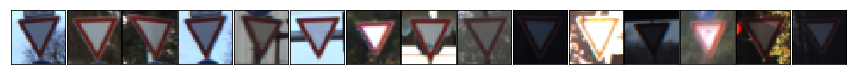

14. Stop - Samples: 690


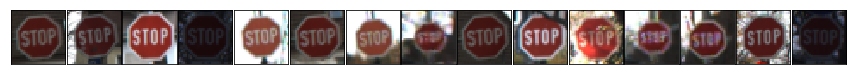

15. No vehicles - Samples: 540


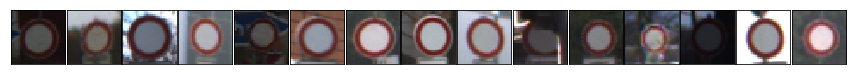

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


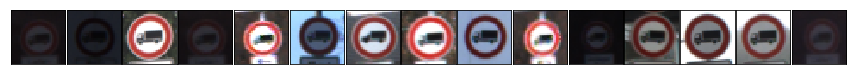

17. No entry - Samples: 990


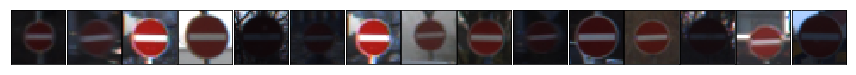

18. General caution - Samples: 1080


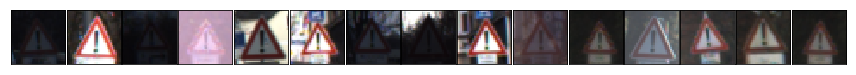

19. Dangerous curve to the left - Samples: 180


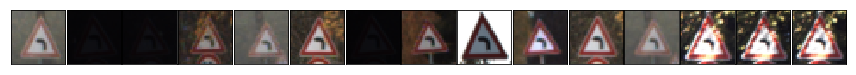

20. Dangerous curve to the right - Samples: 300


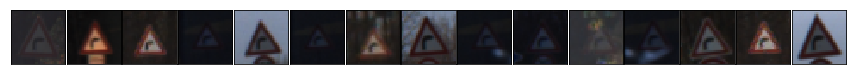

21. Double curve - Samples: 270


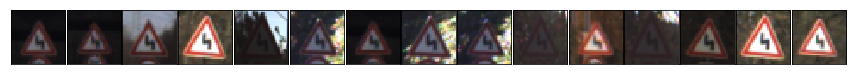

22. Bumpy road - Samples: 330


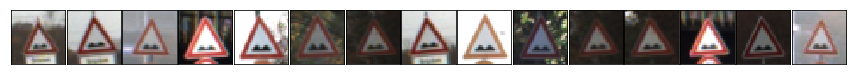

23. Slippery road - Samples: 450


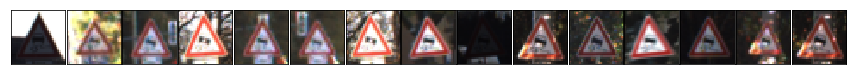

24. Road narrows on the right - Samples: 240


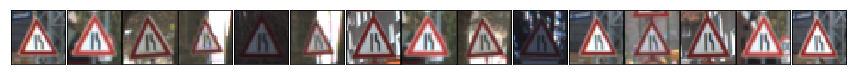

25. Road work - Samples: 1350


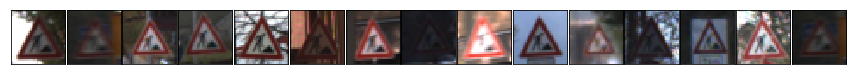

26. Traffic signals - Samples: 540


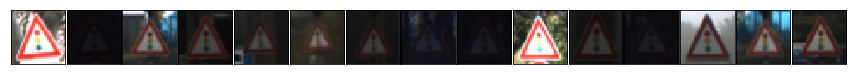

27. Pedestrians - Samples: 210


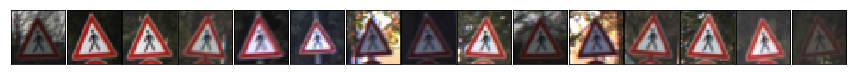

28. Children crossing - Samples: 480


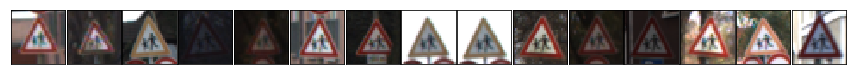

29. Bicycles crossing - Samples: 240


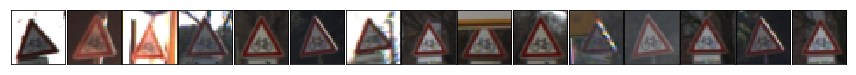

30. Beware of ice/snow - Samples: 390


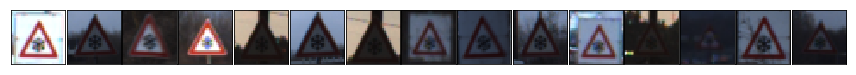

31. Wild animals crossing - Samples: 690


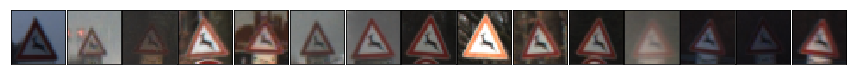

32. End of all speed and passing limits - Samples: 210


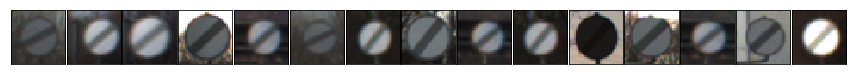

33. Turn right ahead - Samples: 599


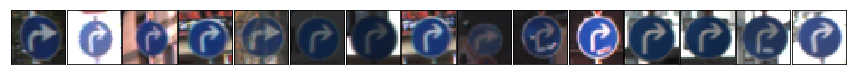

34. Turn left ahead - Samples: 360


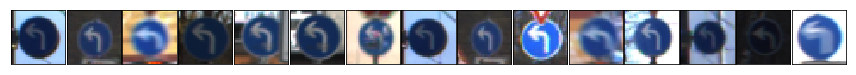

35. Ahead only - Samples: 1080


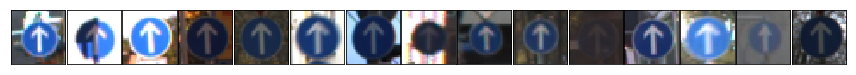

36. Go straight or right - Samples: 330


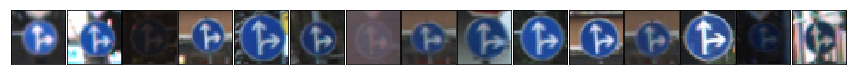

37. Go straight or left - Samples: 180


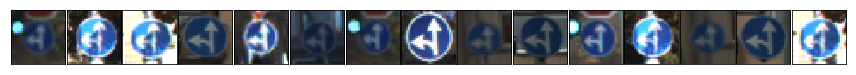

38. Keep right - Samples: 1860


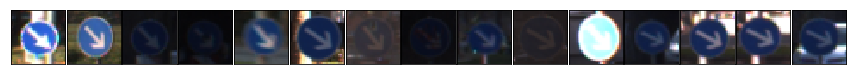

39. Keep left - Samples: 270


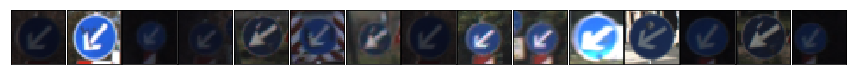

40. Roundabout mandatory - Samples: 300


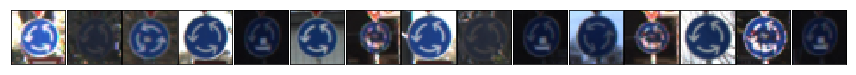

41. End of no passing - Samples: 210


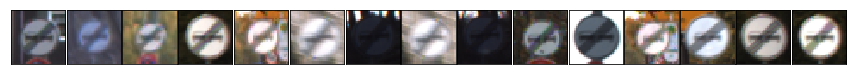

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


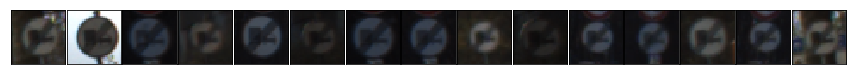

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import cv2

# Visualizations will be shown in the notebook.


def getSignNames():
    return pd.read_csv(r'C:\Users\RAVINDER\Downloads\traffic-signs-data\signs.csv').values


def plotImages(X, y, examples_per_sign=15, squeeze=False, cmap=None):
    samples_per_sign = np.bincount(y)
    for sign in getSignNames():
        print("{0}. {1} - Samples: {2}".format(sign[1], sign[2], samples_per_sign[sign[1]]))
        sample_indices = np.where(y==sign[1])[0]
        random_samples = random.sample(list(sample_indices), examples_per_sign)
        fig = plt.figure(figsize = (examples_per_sign, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(examples_per_sign):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1,examples_per_sign, i+1, xticks=[], yticks=[])
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()
plotImages(X_train, y_train)

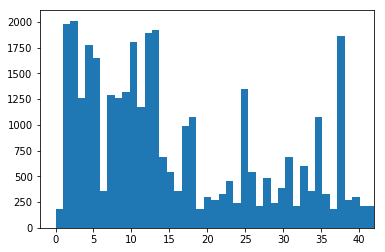

In [14]:
plt.hist(y_train, bins = n_classes)
plt.xlim(xmax=n_classes-1)
plt.show()

In [15]:

def grayscale(img):    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)[:,:,None]


def normalizeImage(img):
    a = -0.5
    b = 0.5
    minimum = 0
    maximum = 255
    return a + ((img - minimum) * (b - a)) / (maximum - minimum)

def preprocessImages(images):
    ret_array = []
    for img in images:
        ret_array.append(normalizeImage(grayscale(img)))
    return ret_array


X_train = preprocessImages(X_train)
X_valid = preprocessImages(X_valid)
X_test = preprocessImages(X_test)

0. Speed limit (20km/h) - Samples: 180


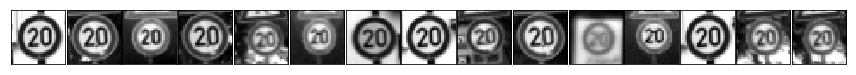

1. Speed limit (30km/h) - Samples: 1980


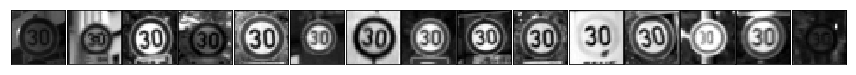

2. Speed limit (50km/h) - Samples: 2010


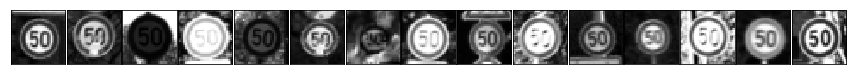

3. Speed limit (60km/h) - Samples: 1260


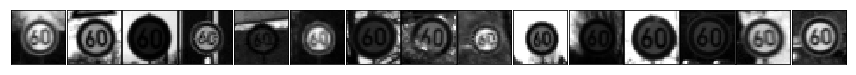

4. Speed limit (70km/h) - Samples: 1770


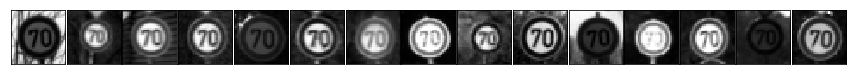

5. Speed limit (80km/h) - Samples: 1650


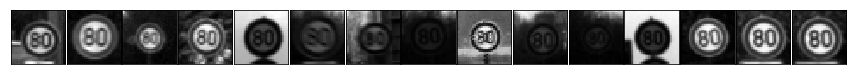

6. End of speed limit (80km/h) - Samples: 360


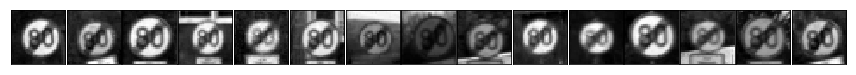

7. Speed limit (100km/h) - Samples: 1290


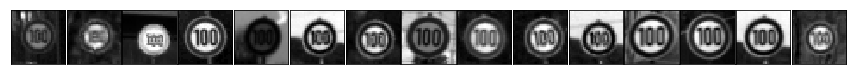

8. Speed limit (120km/h) - Samples: 1260


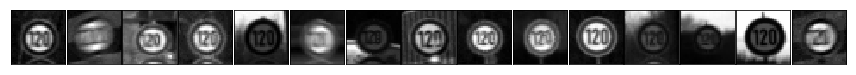

9. No passing - Samples: 1320


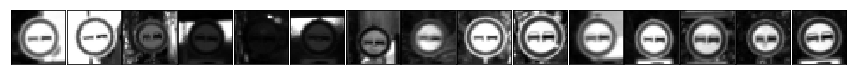

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


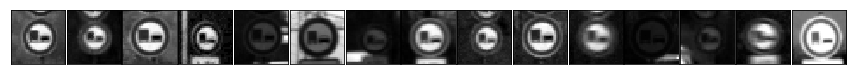

11. Right-of-way at the next intersection - Samples: 1170


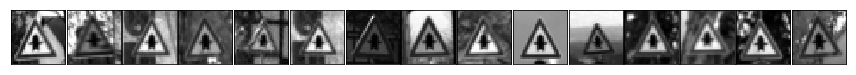

12. Priority road - Samples: 1890


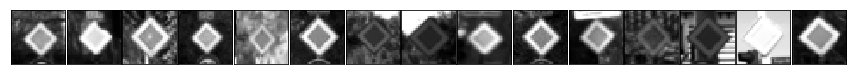

13. Yield - Samples: 1920


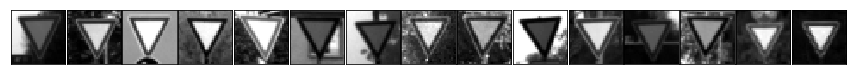

14. Stop - Samples: 690


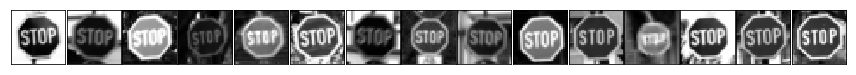

15. No vehicles - Samples: 540


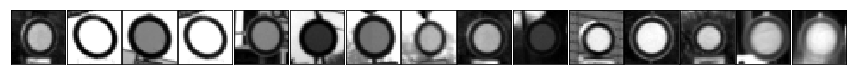

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


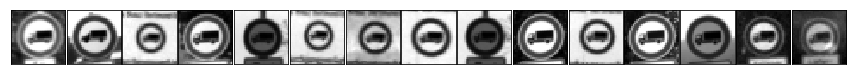

17. No entry - Samples: 990


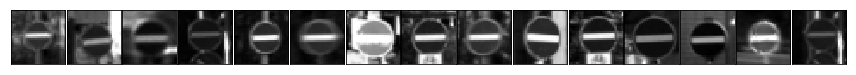

18. General caution - Samples: 1080


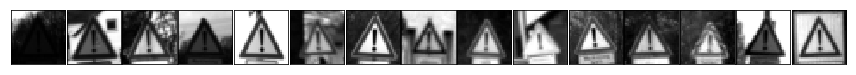

19. Dangerous curve to the left - Samples: 180


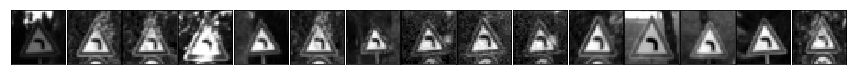

20. Dangerous curve to the right - Samples: 300


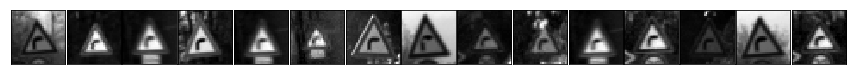

21. Double curve - Samples: 270


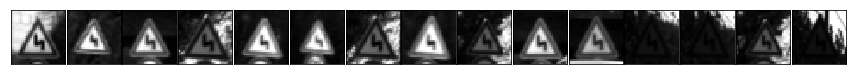

22. Bumpy road - Samples: 330


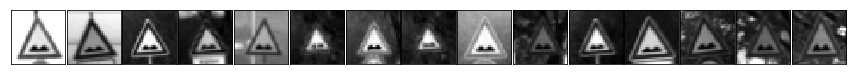

23. Slippery road - Samples: 450


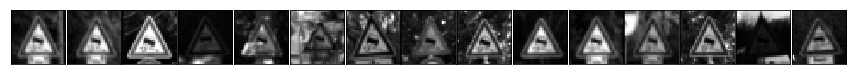

24. Road narrows on the right - Samples: 240


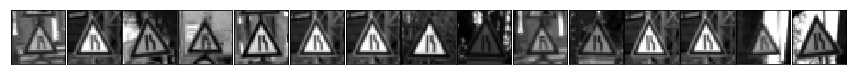

25. Road work - Samples: 1350


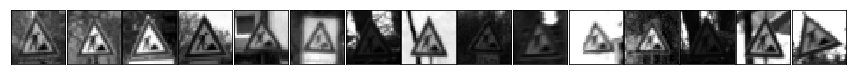

26. Traffic signals - Samples: 540


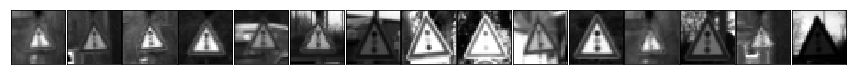

27. Pedestrians - Samples: 210


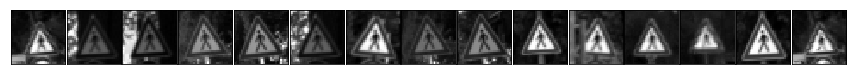

28. Children crossing - Samples: 480


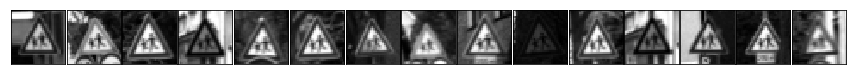

29. Bicycles crossing - Samples: 240


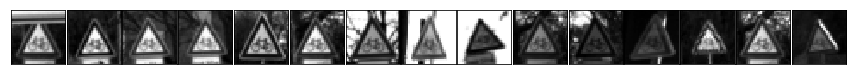

30. Beware of ice/snow - Samples: 390


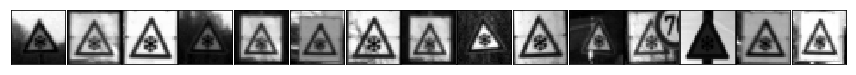

31. Wild animals crossing - Samples: 690


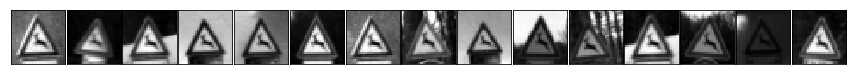

32. End of all speed and passing limits - Samples: 210


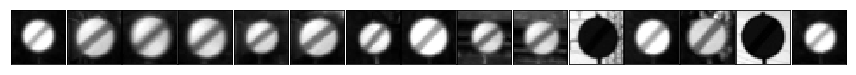

33. Turn right ahead - Samples: 599


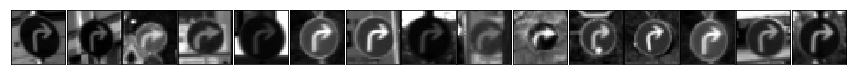

34. Turn left ahead - Samples: 360


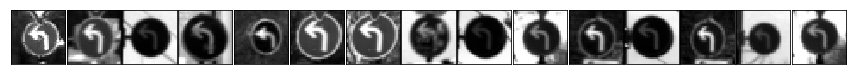

35. Ahead only - Samples: 1080


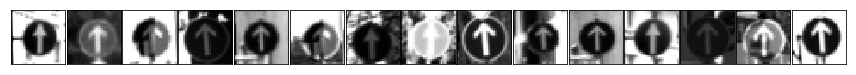

36. Go straight or right - Samples: 330


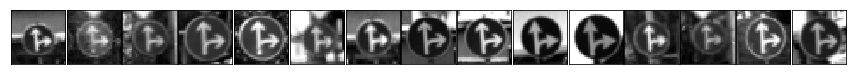

37. Go straight or left - Samples: 180


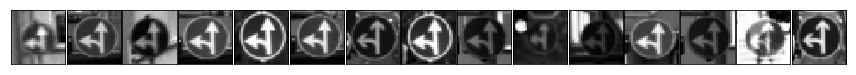

38. Keep right - Samples: 1860


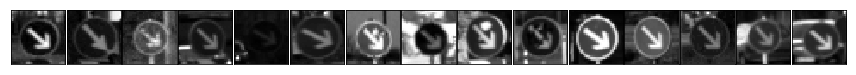

39. Keep left - Samples: 270


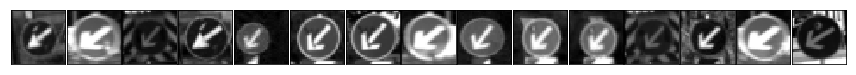

40. Roundabout mandatory - Samples: 300


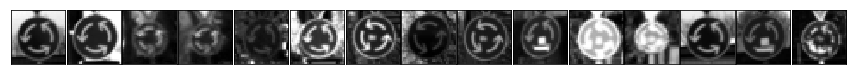

41. End of no passing - Samples: 210


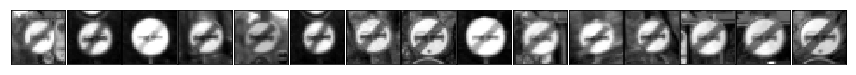

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


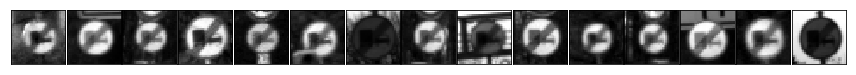

In [16]:
plotImages(X_train, y_train, squeeze=True, cmap='gray')


In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import os
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

def LeNet(x, num_labels):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Convolutional Layer. Input = 32x32x1. Output = 28x28x48.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 48), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros([48]))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    # Max Pooling. Input = 28x28x48. Output = 14x14x48.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Convolutional Layer. Output = 10x10x96.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 48, 96), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros([96]))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # Max Pooling. Input = 10x10x96. Output = 5x5x96.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Convolutional Layer. Input = 5x5x96. Output = 3x3x172.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 172), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros([172]))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    
    # Max Pooling. Input = 3x3x172. Output = 2x2x172.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
    
    # Flatten. Input = 2x2x172. Output = 688.
    fc1 = flatten(conv3)
    
    # Fully Connected. Input = 688. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(688 , 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros([84]))
    fc2 = tf.nn.xw_plus_b(fc1, fc2_W, fc2_b)
    fc2 = tf.nn.relu(fc2)

    # Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, num_labels), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros([num_labels]))
    logits = tf.nn.xw_plus_b(fc2, fc3_W, fc3_b)
    
    return logits

# tf.one_hot() on windows in GPU mode failed with CUDA_ERROR_ILLEGAL_ADDRESS
# https://github.com/tensorflow/tensorflow/issues/6509

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

y_one_hot = tf.one_hot(y, n_classes)
#y_one_hot = one_hot_workaround(y, n_classes)
logits = LeNet(x, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(_sentinel=None,
    labels=y_one_hot,
    logits=logits,
    dim=-1,
    name=None)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
training_operation = optimizer.minimize(loss_operation)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

EPOCHS = 5
BATCH_SIZE = 128

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    for i in range(EPOCHS):
        print("EPOCH {} ... ".format(i+1), end='')
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, r'C:\Users\RAVINDER\Desktop\saver\lenet')
    print("Model saved")

Training...
EPOCH 1 ... Validation Accuracy = 0.863
EPOCH 2 ... Validation Accuracy = 0.883
EPOCH 3 ... Validation Accuracy = 0.933
EPOCH 4 ... Validation Accuracy = 0.938
EPOCH 5 ... Validation Accuracy = 0.934
Model saved


In [19]:

with tf.Session() as sess:
    saver.restore(sess, r'C:\Users\RAVINDER\Desktop\saver\lenet')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from C:\Users\RAVINDER\Desktop\saver\lenet
Test Accuracy = 0.914


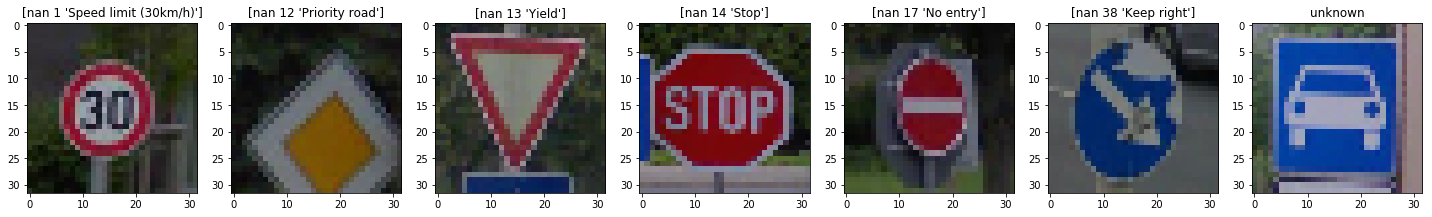

In [42]:

### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob

signs_from_web = []
labels = []

img_files = glob.glob(r'C:\Users\RAVINDER\Desktop\images\*.jpg')
sign_names = getSignNames()

for file in img_files:
    # get label from file, first 2 digits of filename
    label = int(file.split('\\')[-1][:2])
    labels.append(label)
    img =  cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (32, 32)) 
    signs_from_web.append(resized_image)
    
def draw_images(data, images_per_line=7, squeeze=False, cmap=None):
    for offset in range(0, len(data), images_per_line):
        batch = data[offset:offset + images_per_line]
        fig = plt.figure(figsize = (25,5))
        for i in range(len(batch)):
            axis = fig.add_subplot(1, len(batch), i + 1)
            if labels[offset+i] < len(sign_names):
                axis.set_title(sign_names[labels[offset+i]])
            else:
                axis.set_title('unknown')
            image = batch[i]
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()
        
draw_images(signs_from_web)



In [43]:
signs_from_web_proccessed = preprocessImages(signs_from_web)

In [44]:
labels[-1] = 0

In [45]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
BATCH_SIZE = 128

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    saver.restore(sess, r'C:\Users\RAVINDER\Desktop\saver\lenet')

    test_accuracy = evaluate(signs_from_web_proccessed, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from C:\Users\RAVINDER\Desktop\saver\lenet
Test Accuracy = 0.714


INFO:tensorflow:Restoring parameters from C:\Users\RAVINDER\Desktop\saver\lenet


C:\Users\RAVINDER\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


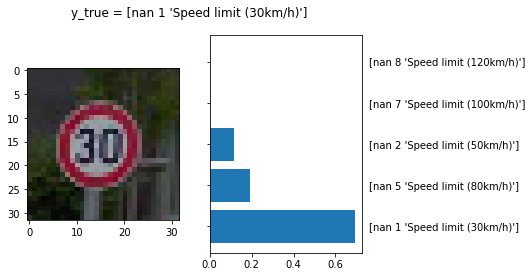

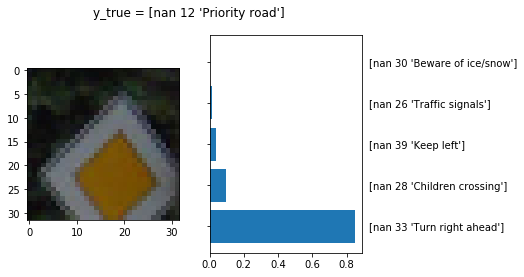

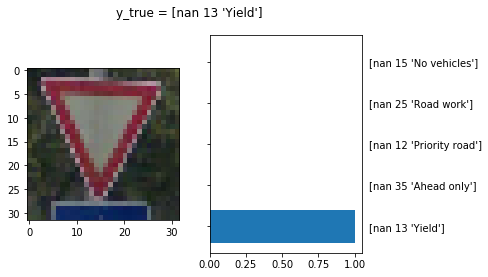

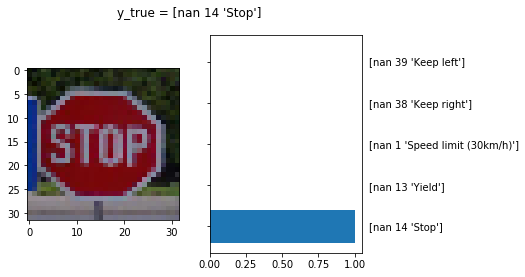

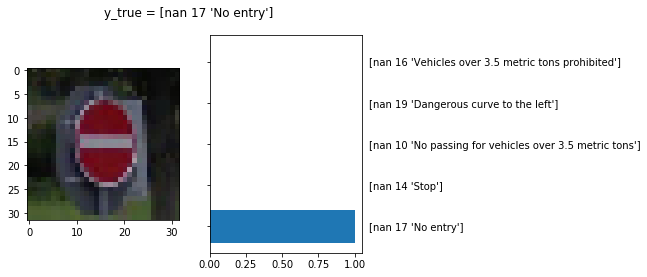

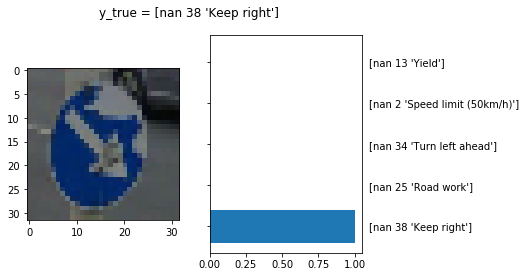

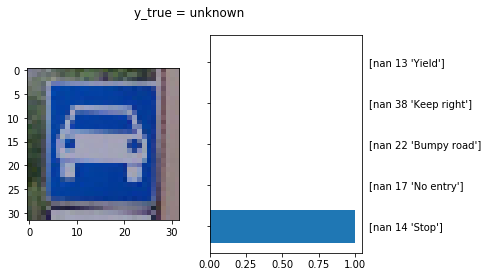

In [46]:

TOP_K = 5

with tf.Session() as sess:
    saver.restore(sess, r'C:\Users\RAVINDER\Desktop\saver\lenet')
    top = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=TOP_K), feed_dict={x:signs_from_web_proccessed})

for i in range(len(img_files)):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False)
    # last image is not in training set
    if i == len(img_files)-1:
        f.suptitle("y_true = unknown")
    else:
        f.suptitle("y_true = {}".format(sign_names[labels[i]]))
    ax1.imshow(signs_from_web[i])
    ax2.barh(range(TOP_K), top.values[i], align='center')
    ax2.set_yticks(range(TOP_K))
    ax2.set_yticklabels( sign_names[top[1][i].astype(int)])
    ax2.tick_params(labelleft='off' , labelright='on')